In [10]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [11]:
#loading dataset from sklearn 
dt=load_boston()
X=dt.data
y=dt.target
X.shape,y.shape

((506, 13), (506,))

In [12]:
#column names
dt.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
df=pd.DataFrame(X)
df.columns=dt.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


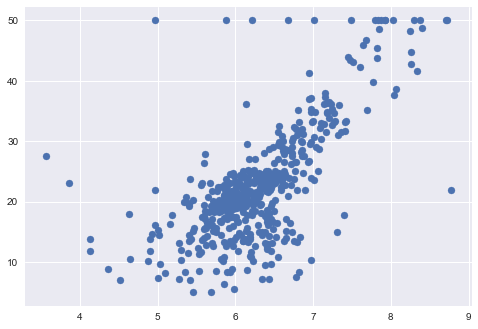

In [14]:
plt.style.use('seaborn')
plt.scatter(X[:,5],y)
plt.show()

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
# normalising the data
u=np.mean(X,axis=0)
sig=np.std(X,axis=0)
X=(X-u)/sig


In [17]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [18]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))

In [19]:
X.shape

(506, 14)

 Optimising Code using Vectorization

In [20]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    m=X.shape[0]
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    theta_list=[]
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        theta_list.append(theta)
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list,theta_list

In [51]:
theta,el,tl=gradient_descent(X,y)

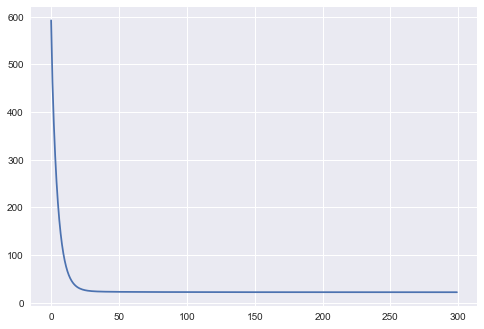

In [52]:
plt.plot(el)
plt.show()

In [23]:
def r2Score(X,y,theta):
    y_=hypothesis(X,theta)
    res=np.sum((y-y_)**2)
    tt=np.sum((y-y.mean())**2)
    r2=1-res/tt
    return r2*100

#### Score

In [24]:
r2Score(X,y,theta)

74.04541323942743

In [ ]:
# mini batch gardient descent optimization

def Mini_Batch_gradient_descent(X,y,batch_size=10,r = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    theta_list=[]
    data=np.hstack((X,y.reshape(-1,1)))
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        theta_list.append(theta)
        # Mini Batch Gradient descent
        np.random.shuffle(data)
        total_batch=X.shape[0]//batch_size
        
        for i in range(total_batch):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            Xb=batch_data[:,:-1]
            yb=batch_data[:,-1]
            bgrad=gradient(Xb,yb,theta)
            theta=theta-r*bgrad
        
    return theta,error_list,theta_list

In [45]:
theta,el,tl=Mini_Batch_gradient_descent(X,y)

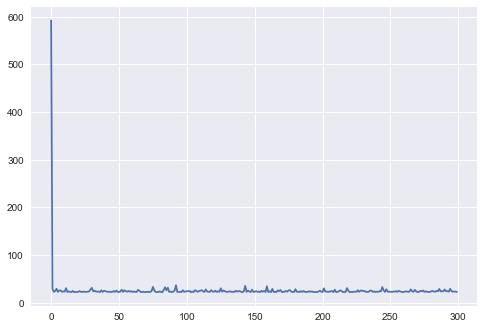

22.735196107593968


In [49]:
# how fast it converges to minima 
# noise to avoid local minima 
plt.plot(el)
plt.show()
print(el[-1])